In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score
from scipy.stats import zscore
from sklearn import svm
from sklearn import metrics
from sklearn.decomposition import PCA

In [101]:
dataSet = pd.read_csv('vehicle.csv')

In [102]:
print("The 5 point summary of the dataSet is: ")
dataSet.describe()

The 5 point summary of the dataSet is: 


compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [5]:
dataSet.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [6]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [7]:
dataSet.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Hence, we can see there are null values in following attributes/ columns: circularity, distance_circularity, radius_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2.

In [8]:
print ("The total number of the null values are:") 
dataSet.isna().sum().sum()

The total number of the null values are:


41

Treating these nulls by replacing the same by mean of the data.

In [9]:
for n in dataSet.columns:
    if dataSet[n].isna().sum() > 0:
        dataSet[n].fillna(value = int(dataSet[n].mean()), inplace = True)

In [10]:
dataSet.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

Now we can see there are no null values in the dataFrame.

In [11]:
#Getting the data type and other info of the data frame:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [12]:
#Converting the class attribute to categorical type as it defines what is the category of the vehicle:
dataSet['class'] = pd.Categorical(dataSet['class'])

In [13]:
dataSet.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         168.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

This is how our dataSet now looks- Without any null values (replaced all the nulls with the column mean) and class attribute converted to categorical type.

Now, we will be scaling the whole dataSet so as to make the values uniform.

In [14]:
dataSetScaled = dataSet.drop('class', axis = 1)
dataSetScaled = dataSetScaled.apply(zscore)

In [15]:
#The scaled dataSet is as followed:
dataSetScaled['class'] = dataSet['class']
dataSetScaled.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.056579      0.273153   
1    -0.325470    -0.623732              0.120145     -0.835252   
2     1.254193     0.844303              1.518604      1.201816   
3    -0.082445    -0.623732             -0.006988     -0.296028   
4    -1.054545    -0.134387             -0.769784      1.081989   
5     1.618730    -0.134387              1.518604      0.093412   
6     0.403605    -0.297502             -0.579085      0.123369   
7    -0.446982    -0.297502             -1.024049     -0.355942   
8    -0.933032    -1.765536             -1.278314     -0.865208   
9    -0.082445    -0.134387              1.010074     -0.026416   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.208006   
1             -0.593753                 0.094079      -0.599860   
2              0.548738                 0.311542       1.148414   
3              0.167907                 0.094079      -0.750573   
4              5.245643                 9.444962      -0.599860   
5             -1.482357                -0.558308       2.595261   
6              0.421794                -0.558308      -0.479290   
7              0.421794                 0.094079      -0.961572   
8             -0.085979                -0.340845      -1.413712   
9              0.040964                 0.529004       0.424990   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136720               -0.224342                   0.758332   
1       0.520990               -0.610886                  -0.344578   
2      -1.144180                0.935290                   0.689401   
3       0.649080               -0.610886                  -0.344578   
4       0.520990               -0.610886                  -0.275646   
5      -1.912721                2.868010                   1.447652   
6       0.136720               -0.610886                  -0.344578   
7       0.905261               -0.997430                  -0.137782   
8       1.673801               -1.383974                  -1.447489   
9      -0.631820                0.548746                  -0.137782   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.403005          -0.343021                   0.285669   
1        -0.594474          -0.620872                  -0.513667   
2         1.096835           1.108610                   1.392442   
3        -0.913589          -0.739951                  -1.466721   
4         1.671241          -0.649224                   0.408644   
5         2.915789           2.934489                   2.745164   
6        -0.403005          -0.445089                  -0.083255   
7        -0.849766          -0.898723                  -0.329205   
8        -1.519907          -1.227608                  -1.927876   
9         0.426694           0.371454                  -0.698129   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327652       -0.073812          0.380744   
1                    -0.059703        0.538390          0.156668   
2                     0.074272        1.558727         -0.403523   
3                    -1.265475       -0.073812         -0.291484   
4                     7.308903        0.538390         -0.179446   
5                     1.681968       -0.277879         -0.403523   
6                    -0.863551        1.354659         -1.299827   
7                    -0.729576       -0.686013         -1.075751   
8                    -1.131500       -0.890081          0.156668   
9                    -1.131500       -0.481946          0.156668   

   skewness_about.2  hollows_ratio class  
0         -0.312012       0.183957   van  
1          0.013265       0.452977   van  
2         -0.149374       0.049447   car  
3          1.639649       1.529056   van  
4         -1.450481      -1.6991

Now that the data is scaled, converting the categorical column 'class' to a numeric one by assigning each class of vehicle a number as follows:

In [16]:
dataSetScaled['class'].values

[van, van, car, van, bus, ..., car, van, car, car, van]
Length: 846
Categories (3, object): [bus, car, van]

In [17]:
#There are 3 classes bus, car and van which will be converted as bus = 0, car = 1 and van = 2
replace_map = {'class':{'bus':0, 'car':1, 'van':2}}
dataSetScaled = dataSetScaled.replace(replace_map)

Now that the data is ready, finding the correlation of the dataSet to fing the highest correlating attributes to the target column 'Class'

In [18]:
dataSetScaled.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789912   
circularity                     0.684887     1.000000              0.792444   
distance_circularity            0.789912     0.792444              1.000000   
radius_ratio                    0.689796     0.621051              0.766955   
pr.axis_aspect_ratio            0.091534     0.153778              0.158296   
max.length_aspect_ratio         0.148249     0.251467              0.264558   
scatter_ratio                   0.812269     0.847310              0.904459   
elongatedness                  -0.788573    -0.821067             -0.911464   
pr.axis_rectangularity          0.813694     0.843400              0.893102   
max.length_rectangularity       0.676143     0.961318              0.774664   
scaled_variance                 0.762732     0.796025              0.861961   
scaled_variance.1               0.815890     0.837479              0.887321   
scaled_radius_of_gyration       0.585207     0.925806              0.705970   
scaled_radius_of_gyration.1    -0.249847     0.051750             -0.225686   
skewness_about                  0.236078     0.144198              0.114191   
skewness_about.1                0.157248    -0.011457              0.265462   
skewness_about.2                0.298537    -0.104426              0.145697   
hollows_ratio                   0.365552     0.046351              0.332129   
class                          -0.033796    -0.158910             -0.064879   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689796              0.091534   
circularity                      0.621051              0.153778   
distance_circularity             0.766955              0.158296   
radius_ratio                     1.000000              0.663385   
pr.axis_aspect_ratio             0.663385              1.000000   
max.length_aspect_ratio          0.450045              0.648724   
scatter_ratio                    0.734141              0.103557   
elongatedness                   -0.789659             -0.183060   
pr.axis_rectangularity           0.708536              0.079604   
max.length_rectangularity        0.569086              0.126909   
scaled_variance                  0.793905              0.273213   
scaled_variance.1                0.720009              0.089442   
scaled_radius_of_gyration        0.536476              0.121936   
scaled_radius_of_gyration.1     -0.180622              0.152837   
skewness_about                   0.048842             -0.058371   
skewness_about.1                 0.173811             -0.031938   
skewness_about.2                 0.382237              0.239886   
hollows_ratio                    0.471285              0.267725   
class                           -0.182231             -0.098178   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812269   
circularity                                 0.251467       0.847310   
distance_circularity                        0.264558       0.904459   
radius_ratio                                0.450045       0.734141   
pr.axis_aspect_ratio                        0.648724       0.103557   
max.length_aspect_ratio                     1.000000       0.165985   
scatter_ratio                               0.165985       1.000000   
elongatedness                              -0.179991      -0.970755   
pr.axis_rectangularity                      0.161502       0.989283   
max.length_rectangularity                   0.305943       0.808415   
scaled_variance                             0.318958       0.948341   
scaled_variance.1                           0.143710       0.993821   
scaled_radius_of_gyration                   0.189727       0.799341   
scaled_radius_of_gyration.1                 0.295653      -0.027832   
skewness_about                            

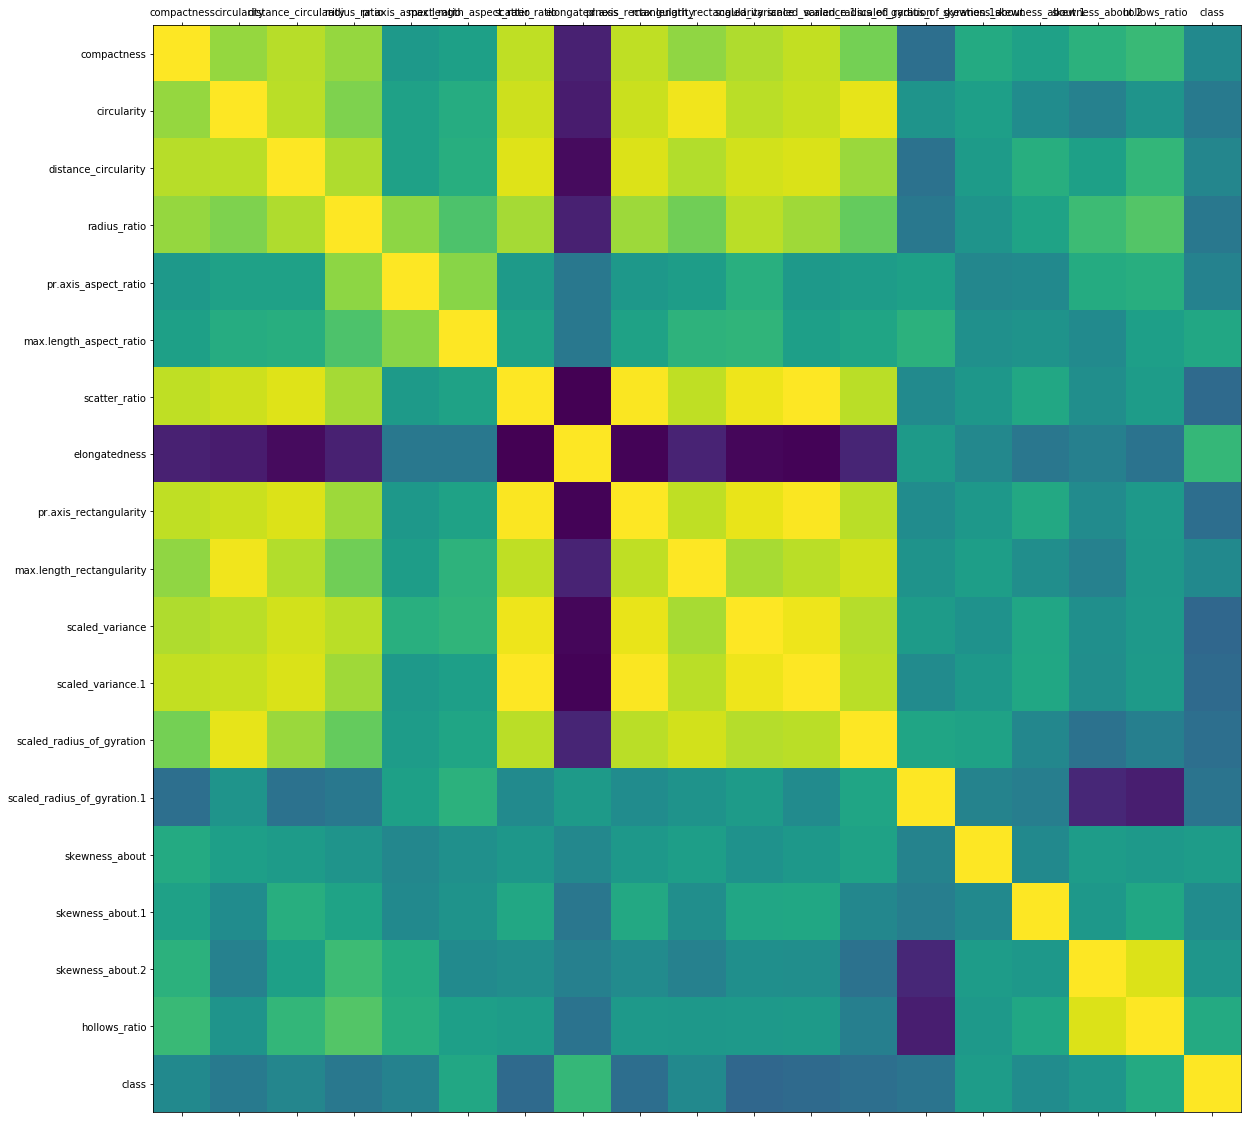

In [19]:
#Plotting a heat map of the above correlation:
def plot_corr(data, size = 20):
    corr = data.corr()
    fig, ax = mp.subplots(figsize = (size, size))
    ax.matshow(corr)
    mp.xticks(range(len(corr.columns)), corr.columns)
    mp.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(dataSetScaled)

Thus, for modeling the support vector machine, referring to the above correlation following attributes will be eliminated:
compactness, max.length_rectangularity,skewness_about.1

In [20]:
def create_confusionMat(test=[], pred=[]):
    confMatrix = metrics.confusion_matrix(test, pred, labels=[1, 0])
    confM_data = pd.DataFrame(confMatrix, index = [i for i in ['1', '0']],
                                        columns = [i for i in ['Predict 1', 'Predict 0']])
    sb.heatmap(confM_data, annot=True, )
    
def cal_accuracy(test = [], pred = []):
    print ("Accuracy of the model is: " + str(metrics.accuracy_score(test, pred)))
    
def classification_report_of_model(test=[], pred = []):
    print ("The classificaiton report of the model is: ")
    print (metrics.classification_report(test, pred, labels=[1, 0]))

In [21]:
X_Values = dataSetScaled.drop(['class', 'max.length_rectangularity', 'compactness', 'skewness_about.1'], axis = 1)
Y_Values = dataSetScaled['class']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_Values, Y_Values, test_size = 0.2 ,random_state = 1)

Building a Support Vector machine:

In [85]:
svm_model = svm.SVC(gamma = 0.025, C = 3)
svm_model.fit(x_train, y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
svm_model.score(x_test,y_test)
pred = svm_model.predict(x_test)

In [25]:
#Following is the accuracy of the support vectr machine:
cal_accuracy(y_test, pred)

Accuracy of the model is: 0.9529411764705882


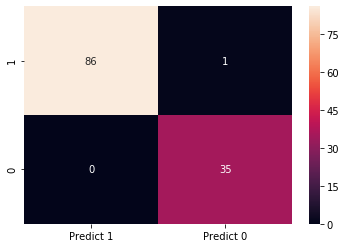

In [26]:
create_confusionMat(y_test, pred)

From the above confusion matrix we can infer that the SVM model:
The total number of true positives are 86. This means, for 86 times the model is able to correctly predict the class of the vehicle.
The total number of false positives are 0, that is the model didn't wrongly predict the class of the vehicle.

The total number of false negatives are 1. This means that only once the model predicts the class of the vehicle to be something else but is something different in actual.

The total number of True negatives are 35. This means for 35 times the model predicted the vehicle class not what it was considered to be.

Now, let's perform a K-Fold Cross Validation of the above Support Vector Machine model.

In [27]:
#Checking out scores of every K-fold cross validation that is K = 5 in out case:
scores = cross_val_score(svm_model, X_Values, Y_Values, cv = 5)
print("The Scores are: ", scores)

The Scores are:  [0.94117647 0.96470588 0.97058824 0.95266272 0.96407186]


Thus, from the above scores of K-fold cross validation we're getting a maximum score of 97.05 when K = 5 for a support vector machine.

**=======================================================================================================================**

Now, using PCA that is principal component analysis to generate the Principal Components. This will be then used to model the SVM and later compared with the model one above.

In [29]:
#For PCA we don't need the target column and hence the dataSet without target column 'class' will be used:
X_dataSet_PCA = dataSetScaled.drop('class', axis = 1)

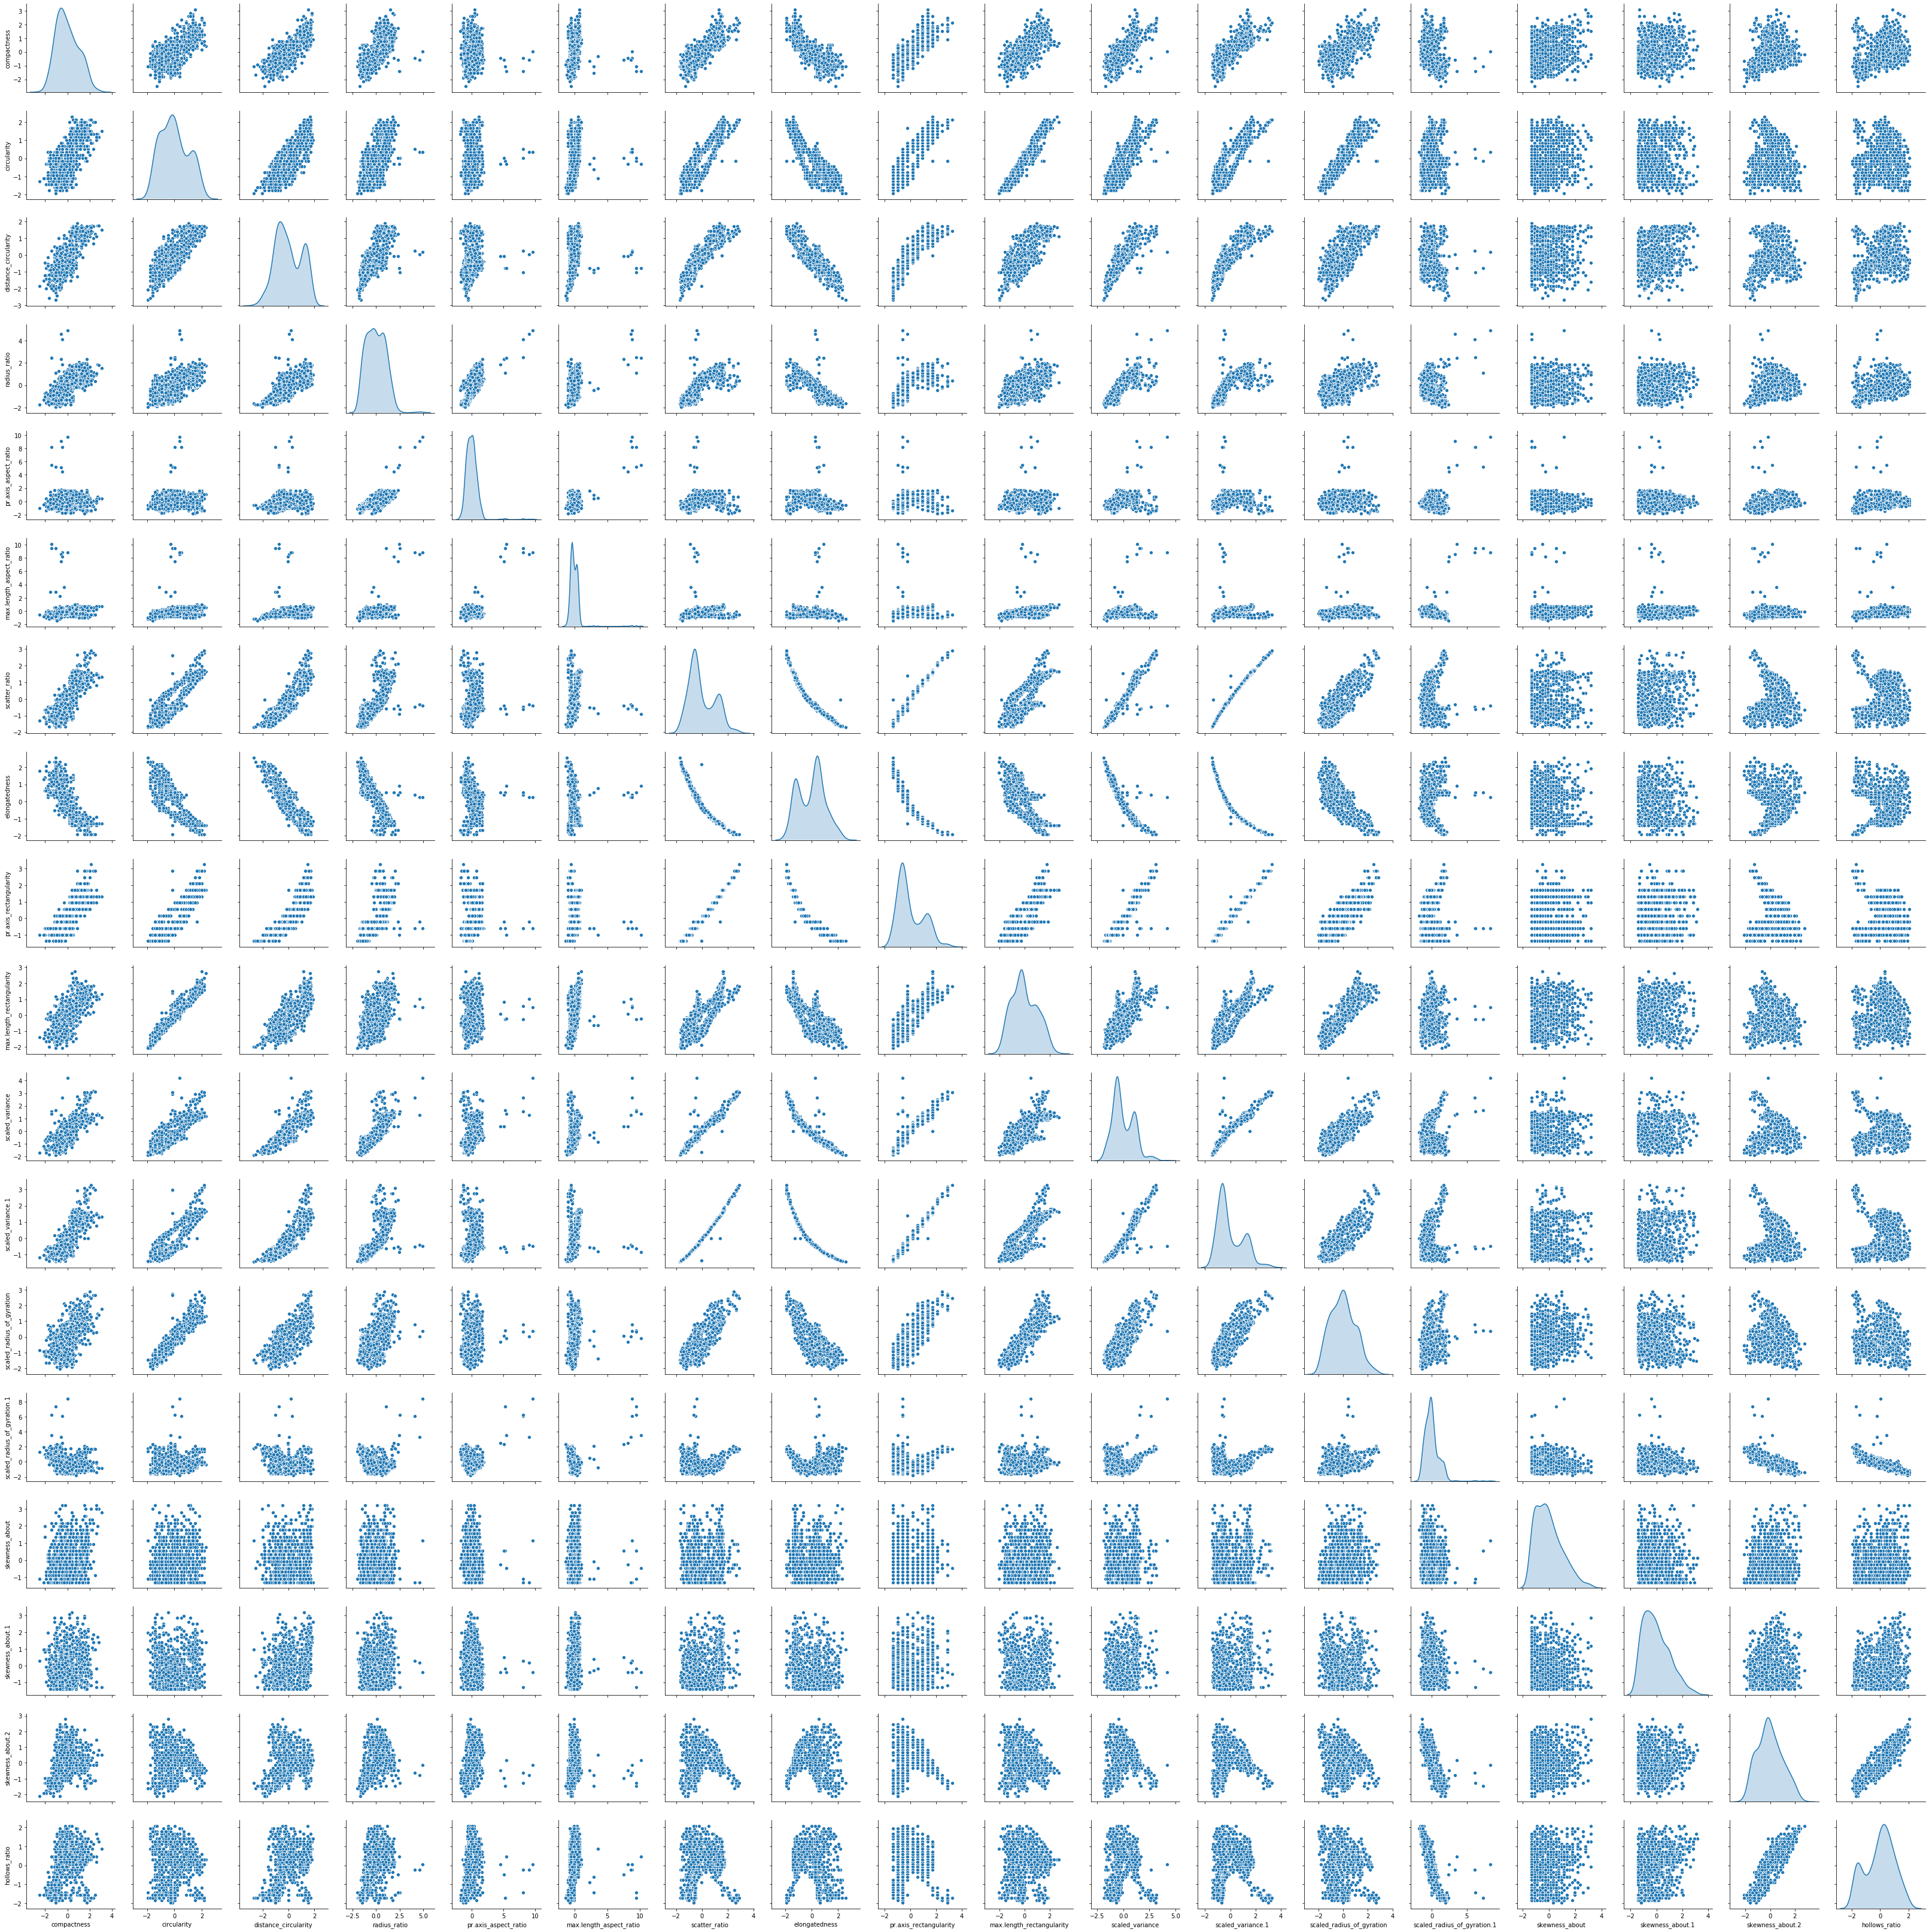

In [30]:
sb.pairplot(X_dataSet_PCA, diag_kind='kde')

In [33]:
#creating the covariance matrix of the above dataSet
covMat = np.cov(X_dataSet_PCA, rowvar= False)
print ("The covariance matrix is: ", covMat)

The covariance matrix is:  [[ 1.00118343  0.68569786  0.79084677  0.69061266  0.09164265  0.14842463
   0.8132298  -0.78950594  0.81465658  0.67694334  0.76363456  0.81685591
   0.58589964 -0.250143    0.23635777  0.15743375  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79338193  0.62178548  0.15396023  0.25176438
   0.84831245 -0.82203893  0.84439802  0.96245572  0.79696661  0.8384697
   0.92690183  0.0518116   0.14436828 -0.01147012 -0.10455005  0.04640562]
 [ 0.79084677  0.79338193  1.00118343  0.76786297  0.15848356  0.26487108
   0.90552954 -0.91254222  0.89415919  0.77558042  0.86298107  0.8883715
   0.70680544 -0.22595289  0.11432633  0.26577604  0.14586931  0.33252248]
 [ 0.69061266  0.62178548  0.76786297  1.00118343  0.66417046  0.45057739
   0.73500962 -0.79059374  0.70937406  0.56975953  0.79484407  0.72086107
   0.53711057 -0.18083586  0.04889974  0.17401646  0.3826897   0.4718431 ]
 [ 0.09164265  0.15396023  0.15848356  0.66417046  1.00118343  0.64949139
   0.1036

Finding the number of n_components that will comprise 95% of the variance:

In [36]:
pca = PCA()
pca.fit(X_dataSet_PCA)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
print("The eigen values are: \n", pca.explained_variance_)

The eigen values are: 
 [9.40669336e+00 3.01481887e+00 1.90349000e+00 1.18014495e+00
 9.17340312e-01 5.39787071e-01 3.58800669e-01 2.21857710e-01
 1.60219732e-01 9.17243969e-02 6.66515113e-02 4.62608051e-02
 3.54823401e-02 2.71922358e-02 2.07291871e-02 1.77124528e-02
 9.36331585e-03 3.03284818e-03]


In [39]:
print("The eigen vectors are: \n", pca.components_)

The eigen vectors are: 
 [[ 2.75296231e-01  2.93201027e-01  3.04592443e-01  2.67631452e-01
   8.04866522e-02  9.72444067e-02  3.16899729e-01 -3.14049281e-01
   3.13930234e-01  2.82784303e-01  3.09331173e-01  3.14157390e-01
   2.71992264e-01 -2.09208296e-02  4.14369860e-02  5.83477626e-02
   3.02857822e-02  7.41555615e-02]
 [-1.26904838e-01  1.25646328e-01 -7.25776950e-02 -1.89545928e-01
  -1.22138839e-01  1.08062346e-02  4.82003480e-02  1.26529128e-02
   5.99843987e-02  1.16288258e-01  6.19574492e-02  5.34343382e-02
   2.09341617e-01  4.88593671e-01 -5.50901318e-02 -1.24062825e-01
  -5.40952022e-01 -5.40348605e-01]
 [-1.19923608e-01 -2.47784067e-02 -5.60533687e-02  2.75035126e-01
   6.42047632e-01  5.91818601e-01 -9.77153408e-02  5.75568804e-02
  -1.09469824e-01 -1.70074363e-02  5.63557872e-02 -1.08794171e-01
  -3.14076239e-02  2.86191584e-01 -1.15645672e-01 -7.54092614e-02
   8.79945895e-03  3.95922426e-02]
 [ 7.83697410e-02  1.87676420e-01 -7.07523746e-02 -4.24711095e-02
   3.2594213

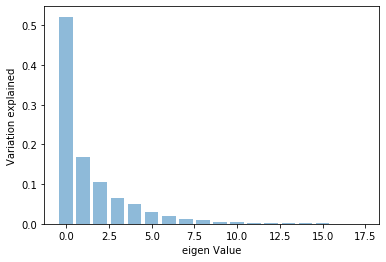

In [51]:
mp.bar(list(range(0,18)),pca.explained_variance_ratio_,alpha=0.5, align='center' )
mp.ylabel('Variation explained')
mp.xlabel('eigen Value')
mp.show()

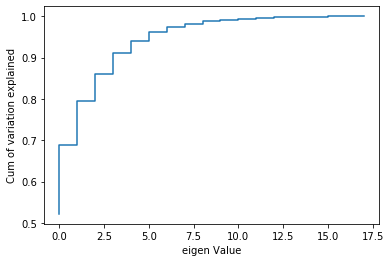

In [53]:
mp.step(list(range(0,18)), np.cumsum(pca.explained_variance_ratio_))
mp.ylabel('Cum of variation explained')
mp.xlabel('eigen Value')
mp.show()

Thus from the above plots, we can select **first 9** components as they comprise of over 95% of the variance of the dataSet.

Now, building an SVM model with 9 principal components.

In [59]:
pca_9 = PCA(n_components=9)
pca_9.fit(X_dataSet_PCA)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
print ("Following components will be conisdered: \n",pca_9.components_)

Following components will be conisdered: 
 [[ 2.75296231e-01  2.93201027e-01  3.04592443e-01  2.67631452e-01
   8.04866522e-02  9.72444067e-02  3.16899729e-01 -3.14049281e-01
   3.13930234e-01  2.82784303e-01  3.09331173e-01  3.14157390e-01
   2.71992264e-01 -2.09208296e-02  4.14369860e-02  5.83477626e-02
   3.02857822e-02  7.41555615e-02]
 [-1.26904838e-01  1.25646328e-01 -7.25776950e-02 -1.89545928e-01
  -1.22138839e-01  1.08062346e-02  4.82003480e-02  1.26529128e-02
   5.99843987e-02  1.16288258e-01  6.19574492e-02  5.34343382e-02
   2.09341617e-01  4.88593671e-01 -5.50901318e-02 -1.24062825e-01
  -5.40952022e-01 -5.40348605e-01]
 [-1.19923608e-01 -2.47784067e-02 -5.60533687e-02  2.75035126e-01
   6.42047632e-01  5.91818601e-01 -9.77153408e-02  5.75568804e-02
  -1.09469824e-01 -1.70074363e-02  5.63557872e-02 -1.08794171e-01
  -3.14076239e-02  2.86191584e-01 -1.15645672e-01 -7.54092614e-02
   8.79945895e-03  3.95922426e-02]
 [ 7.83697410e-02  1.87676420e-01 -7.07523746e-02 -4.2471109

In [62]:
print ("The total ratio of these principal components is: \n", pca_9.explained_variance_ratio_)

The total ratio of these principal components is: 
 [0.52197635 0.16729196 0.10562445 0.06548611 0.05090311 0.02995272
 0.01990981 0.01231086 0.00889057]


In [68]:
#Transforming the dataSet with these pca_9 principal components:
dataSet_pca9_transformed = pca_9.transform(X_dataSet_PCA)

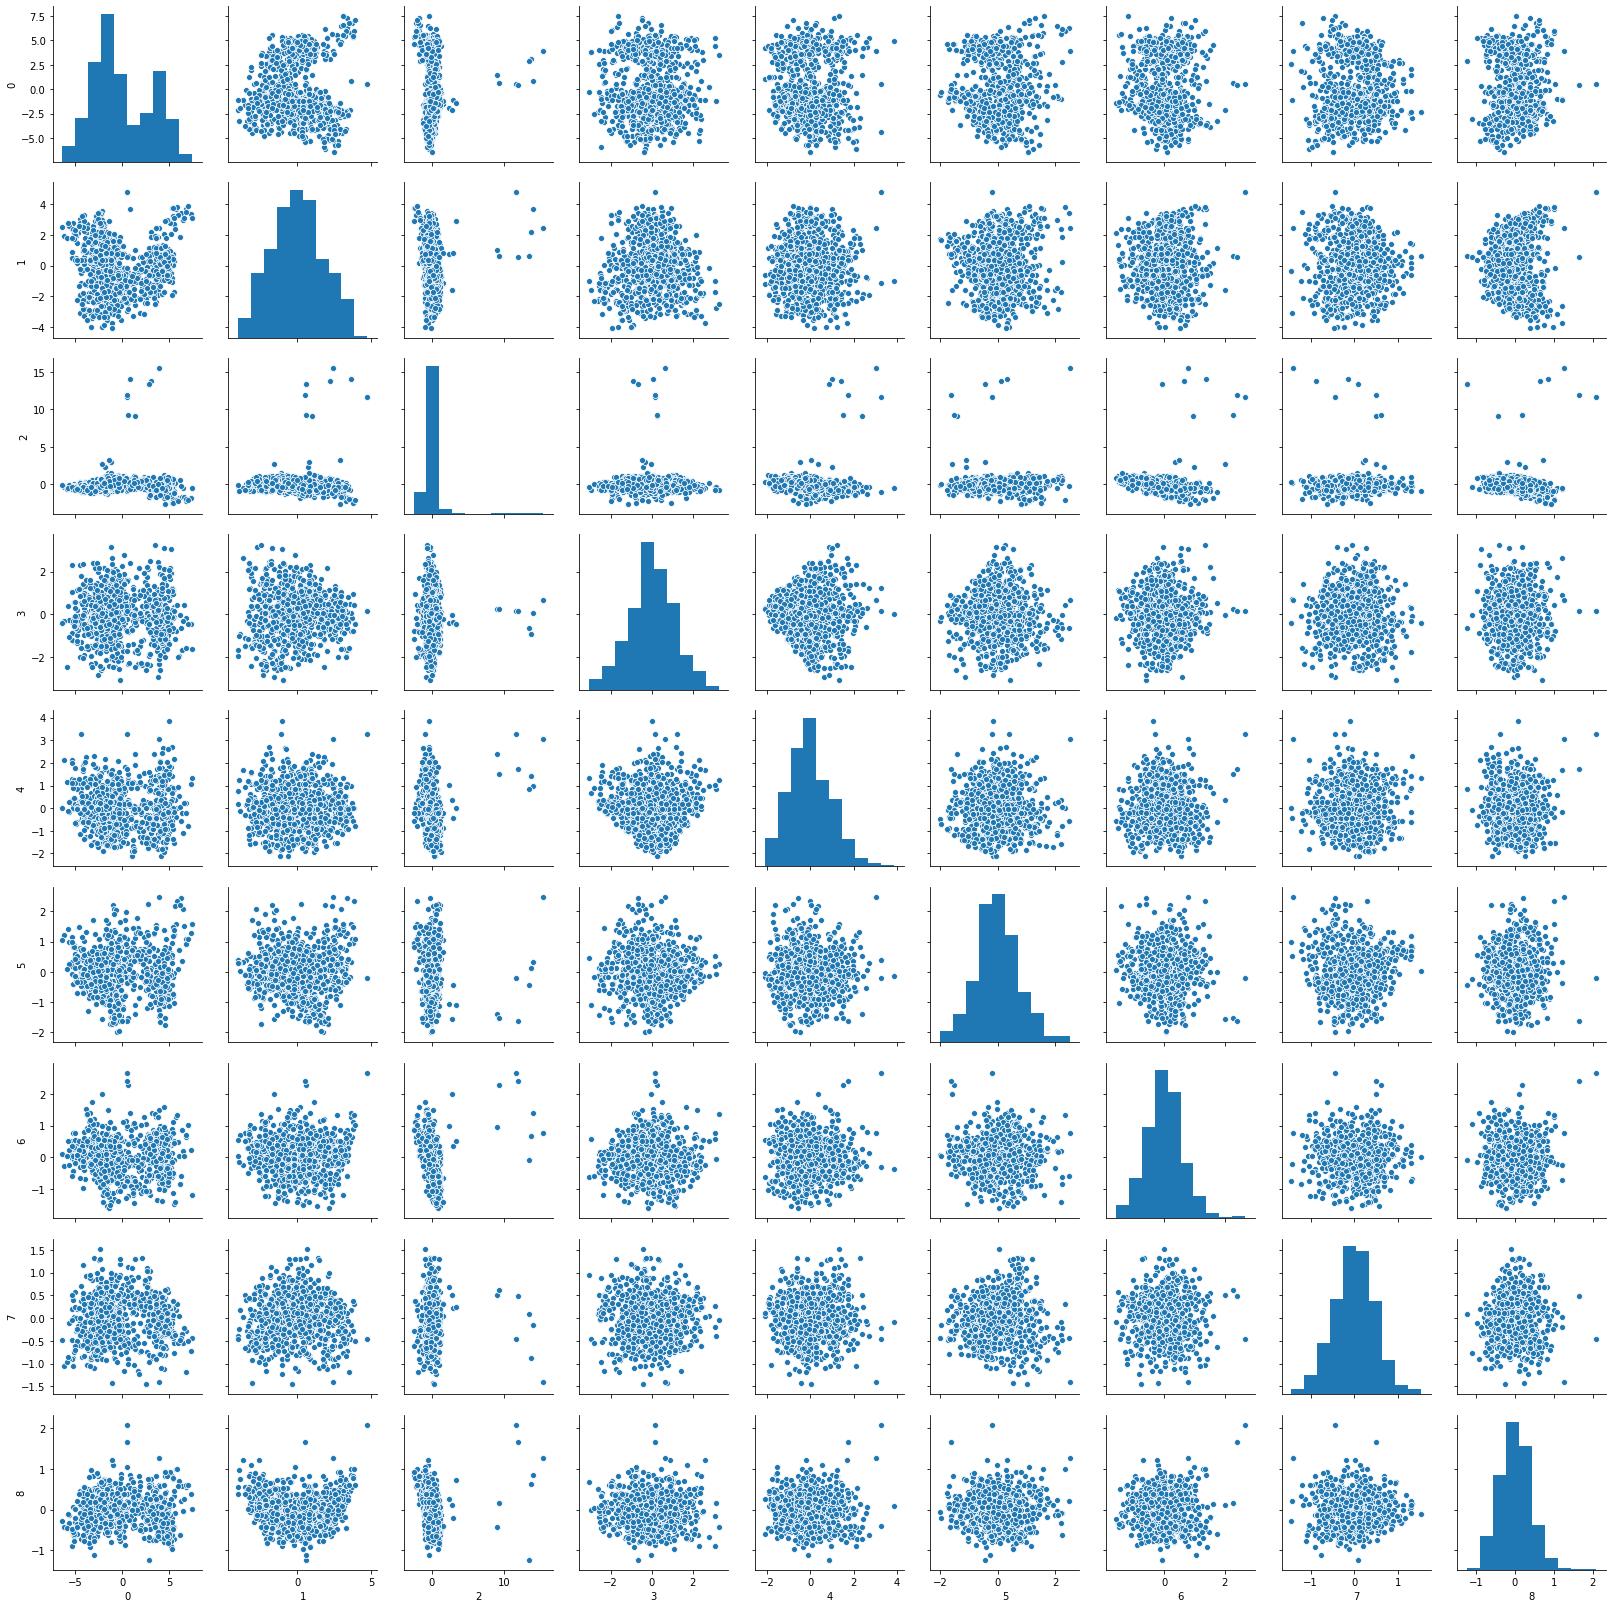

In [70]:
sb.pairplot(pd.DataFrame(dataSet_pca9_transformed))

Fitting the SVM model with the above pca 9 dataSet

In [79]:
dataSet_pca9_transformed = pd.DataFrame(dataSet_pca9_transformed)

In [80]:
dataSet_pca9_transformed.head(10)

0         1          2         3         4         5         6  \
0  0.332852 -0.218790   1.001656  0.177562  0.078943 -0.756840 -0.901063   
1 -1.592955 -0.420714  -0.369109  0.233760  0.693912 -0.517884  0.377784   
2  3.768244  0.195654   0.088137  1.202804  0.731738  0.705407 -0.034350   
3 -1.739728 -2.829916   0.109632  0.377478 -0.362819 -0.485572  0.470017   
4  0.555782  4.758951  11.703308  0.145282  3.257973 -0.205791  2.670588   
5  5.788281  3.680174  -2.010484 -0.771046 -0.393283  1.569581  1.266820   
6 -0.774598 -2.210193  -0.123843  2.114234 -0.192007  0.791792 -0.146619   
7 -2.142518 -1.176820   0.656202  0.825570 -1.242502 -0.643945 -0.137327   
8 -4.459271 -3.098593   0.100480 -0.550944 -0.567733 -0.280342  0.290800   
9  0.944700 -1.833449  -0.067991 -0.642510 -0.405966 -0.337950  0.655118   

          7         8  
0 -0.380143 -0.868948  
1  0.247225  0.147823  
2  0.483474 -0.307702  
3 -0.022484 -0.028804  
4 -0.451863  2.089014  
5  0.169116  0.989695  
6 -0.399906  0.336350  
7 -0.418806  0.001614  
8 -0.385389  0.419044  
9  0.893114  0.401670

In [81]:
dataSet_pca9_transformed['class'] = dataSetScaled['class']

In [83]:
dataSet_pca9_transformed.head(10)

0         1          2         3         4         5         6  \
0  0.332852 -0.218790   1.001656  0.177562  0.078943 -0.756840 -0.901063   
1 -1.592955 -0.420714  -0.369109  0.233760  0.693912 -0.517884  0.377784   
2  3.768244  0.195654   0.088137  1.202804  0.731738  0.705407 -0.034350   
3 -1.739728 -2.829916   0.109632  0.377478 -0.362819 -0.485572  0.470017   
4  0.555782  4.758951  11.703308  0.145282  3.257973 -0.205791  2.670588   
5  5.788281  3.680174  -2.010484 -0.771046 -0.393283  1.569581  1.266820   
6 -0.774598 -2.210193  -0.123843  2.114234 -0.192007  0.791792 -0.146619   
7 -2.142518 -1.176820   0.656202  0.825570 -1.242502 -0.643945 -0.137327   
8 -4.459271 -3.098593   0.100480 -0.550944 -0.567733 -0.280342  0.290800   
9  0.944700 -1.833449  -0.067991 -0.642510 -0.405966 -0.337950  0.655118   

          7         8  class  
0 -0.380143 -0.868948      2  
1  0.247225  0.147823      2  
2  0.483474 -0.307702      1  
3 -0.022484 -0.028804      2  
4 -0.451863  2.089014      0  
5  0.169116  0.989695      0  
6 -0.399906  0.336350      0  
7 -0.418806  0.001614      2  
8 -0.385389  0.419044      2  
9  0.893114  0.401670      1

Now, splitting the above dataSet_pca9_transformed using the train_test_split

In [84]:
X_Vals = dataSet_pca9_transformed.drop('class', axis =1)
Y_Vals = dataSet_pca9_transformed['class']

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_Vals, Y_Vals, test_size = 0.2, random_state = 1)

In [92]:
svm_model_pca = svm.SVC(gamma = 0.025, C = 3)
svm_model_pca.fit(x_train_pca,y_train_pca)
svm_model_pca.score(x_test_pca, y_test_pca)
pred = svm_model_pca.predict(x_test_pca)
svm_model_pca.score(x_test_pca, y_test_pca)

0.9647058823529412

In [93]:
cal_accuracy(y_test_pca, pred)

Accuracy of the model is: 0.9647058823529412


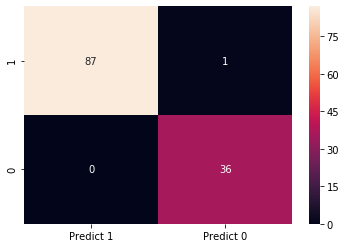

In [94]:
create_confusionMat(y_test_pca, pred)

From the above confusion matrix we can infer that the SVM model:
The total number of true positives are 86. This means, for 87 times the model is able to correctly predict the class of the vehicle.
The total number of false positives are 0, that is the model didn't wrongly predict the class of the vehicle.

The total number of false negatives are 1. This means that only once the model predicts the class of the vehicle to be something else but is something different in actual.

The total number of True negatives are 36. This means for 36 times the model predicted the vehicle class not what it was considered to be.

Now finding the K-Fold cross validation of this SVM model based on the PCA dataSet:

In [97]:
#Checking out scores of every K-fold cross validation that is K = 5 in out case:
scores_pca = cross_val_score(svm_model_pca, X_Vals, Y_Vals, cv = 5)
print("The Scores are: ", scores_pca)

The Scores are:  [0.94705882 0.96470588 0.95882353 0.94674556 0.96407186]


Thus, from the above scores of K-fold cross validation we're getting a maximum score of 96.47 when K = 5 for a support vector machine.

**=======================================================================================================================**

Thus, following inferences can be made from the above activity: 

Accuracy for SVM with original data without PCA = **95.29**

Accuracy for SVM with PCA9 data = **96.47**

Thus, we gain accuracy of almost **1%** by using principal components on the same support vector machine model.

Also, the K-Folds CV score of the SVM with original data is \[0.94117647 0.96470588 0.97058824 0.95266272 0.96407186\] and for the SVM with PCA data is \[0.94705882 0.96470588 0.95882353 0.94674556 0.96407186\] where the maximum score of the SVM with original data is higher.